In [1]:
%matplotlib inline 
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# A little bit of intuition on regularization
Let's build signal approximations under different regularizers 

In [2]:
n_samples = 1000
t = np.array(range(n_samples), dtype=np.float32)
f = 2
X = np.sin(2*np.pi*f*t/n_samples)


We want to approximate the signal X in the mean squared error sense, with a signal of constrained norm:
* L1 norm commonly associated with sparsity
* L2 norm commonly associated with shrinkage
* Linf norm wich we can link to clipping


In [3]:
signal = tf.constant(X, name='data')
approx_signal = tf.Variable(signal, name='filt_signal')
rec_cost = tf.reduce_mean(tf.squared_difference(signal, approx_signal))
L1_reg = tf.reduce_mean(tf.abs(approx_signal)) 
L2_reg = tf.reduce_mean(tf.square(approx_signal)) 
Linf_reg = tf.reduce_max(tf.abs(approx_signal))

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [4]:
def computeApproximation(rec_cost, reg, reg_par=0.1, n_iter=10000):
    cost = rec_cost + reg_par * reg
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
    for i in range(n_iter):
        ## display training accuracy 
        if i%(n_iter/10) == 0:
            rec_MSE = rec_cost.eval()
            sol_norm = reg.eval()
            print("step %d, reconstruction MSE %g, solution norm %g"%(i, rec_MSE, sol_norm)) 
        sess.run(train_step)
    return approx_signal.eval()

step 0, reconstruction MSE 0, solution norm 0.636611
step 1000, reconstruction MSE 0.00789967, solution norm 0.548597
step 2000, reconstruction MSE 0.0252699, solution norm 0.480441
step 3000, reconstruction MSE 0.0460015, solution norm 0.427286
step 4000, reconstruction MSE 0.0668891, solution norm 0.385564
step 5000, reconstruction MSE 0.086362, solution norm 0.352628
step 6000, reconstruction MSE 0.103751, solution norm 0.326492
step 7000, reconstruction MSE 0.118883, solution norm 0.305646
step 8000, reconstruction MSE 0.131821, solution norm 0.288971
step 9000, reconstruction MSE 0.142759, solution norm 0.275572


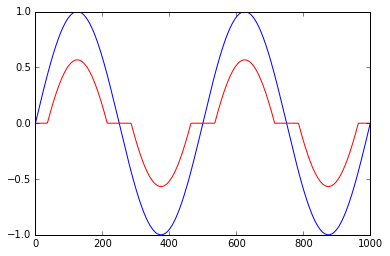

In [5]:
L1_signal = computeApproximation(rec_cost, L1_reg, reg_par=1, n_iter=10000)
plt.plot(X)
plt.hold(True)
plt.plot(L1_signal, 'r')
plt.show()

step 0, reconstruction MSE 0.15193, solution norm 0.119126
step 1000, reconstruction MSE 0.140724, solution norm 0.118736
step 2000, reconstruction MSE 0.134494, solution norm 0.119756
step 3000, reconstruction MSE 0.130894, solution norm 0.121016
step 4000, reconstruction MSE 0.128739, solution norm 0.122118
step 5000, reconstruction MSE 0.127412, solution norm 0.122974
step 6000, reconstruction MSE 0.126574, solution norm 0.123599
step 7000, reconstruction MSE 0.126036, solution norm 0.124042
step 8000, reconstruction MSE 0.125686, solution norm 0.124349
step 9000, reconstruction MSE 0.125456, solution norm 0.12456


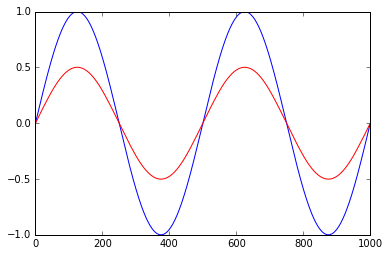

In [6]:
L2_signal = computeApproximation(rec_cost, L2_reg, reg_par=1, n_iter=10000)
plt.plot(X)
plt.hold(True)
plt.plot(L2_signal, 'r')
plt.show()

step 0, reconstruction MSE 0.125304, solution norm 0.501239
step 1000, reconstruction MSE 0.12433, solution norm 0.455701
step 2000, reconstruction MSE 0.122407, solution norm 0.449835
step 3000, reconstruction MSE 0.120264, solution norm 0.450434
step 4000, reconstruction MSE 0.118072, solution norm 0.45179
step 5000, reconstruction MSE 0.116537, solution norm 0.453602
step 6000, reconstruction MSE 0.115104, solution norm 0.456419
step 7000, reconstruction MSE 0.113576, solution norm 0.459723
step 8000, reconstruction MSE 0.11268, solution norm 0.460552
step 9000, reconstruction MSE 0.111913, solution norm 0.461926


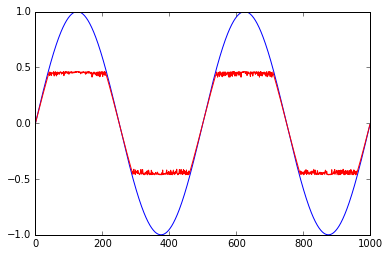

In [7]:
Linf_signal = computeApproximation(rec_cost, Linf_reg, reg_par=0.5, n_iter=10000)
plt.plot(X)
plt.hold(True)
plt.plot(Linf_signal, 'r')
plt.show()